<a href="https://colab.research.google.com/github/MahiraMohammed/Student-depression-prediction/blob/main/ML_Classification_Student_depression_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🎓Student depression prediction project**

Welcome to the **Student Depression Prediction** project!  *italicized text*
*In this notebook, we walk through a complete Machine Learning pipeline to predict whether a student is experiencing depression based on various academic and personal factors.*

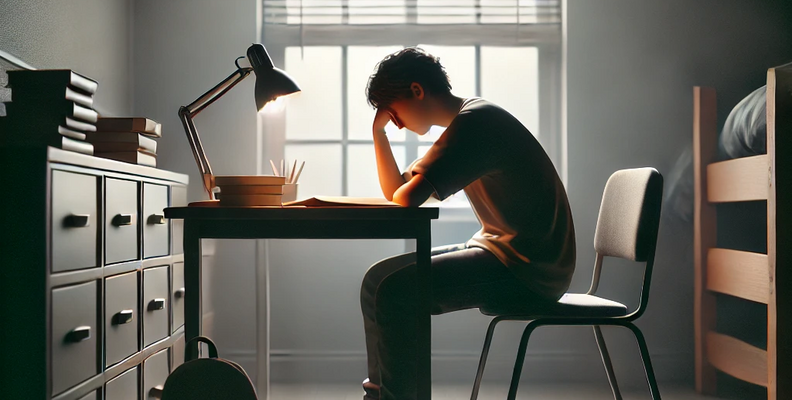



# 🧠 **Problem Statement**
Mental health issues among students, especially depression, have become a growing concern worldwide. Early detection of depressive tendencies can lead to timely interventions and support. However, manual identification through surveys or counseling is not always feasible at scale.




# **🎯 Goal of the Project:** The primary objective of this project is to:

Build a robust machine learning model that can predict whether a student is experiencing depression based on their personal, academic, and social information.

Key Objectives: ✅ Understand the key factors associated with student depression

✅ Preprocess and explore the dataset to gain insights

✅ Train and evaluate multiple machine learning models

✅ Fine-tune the best-performing model for optimal accuracy

✅ Save and deploy the final model for real-world use

✅ Create a user-friendly, report-style notebook for presentation



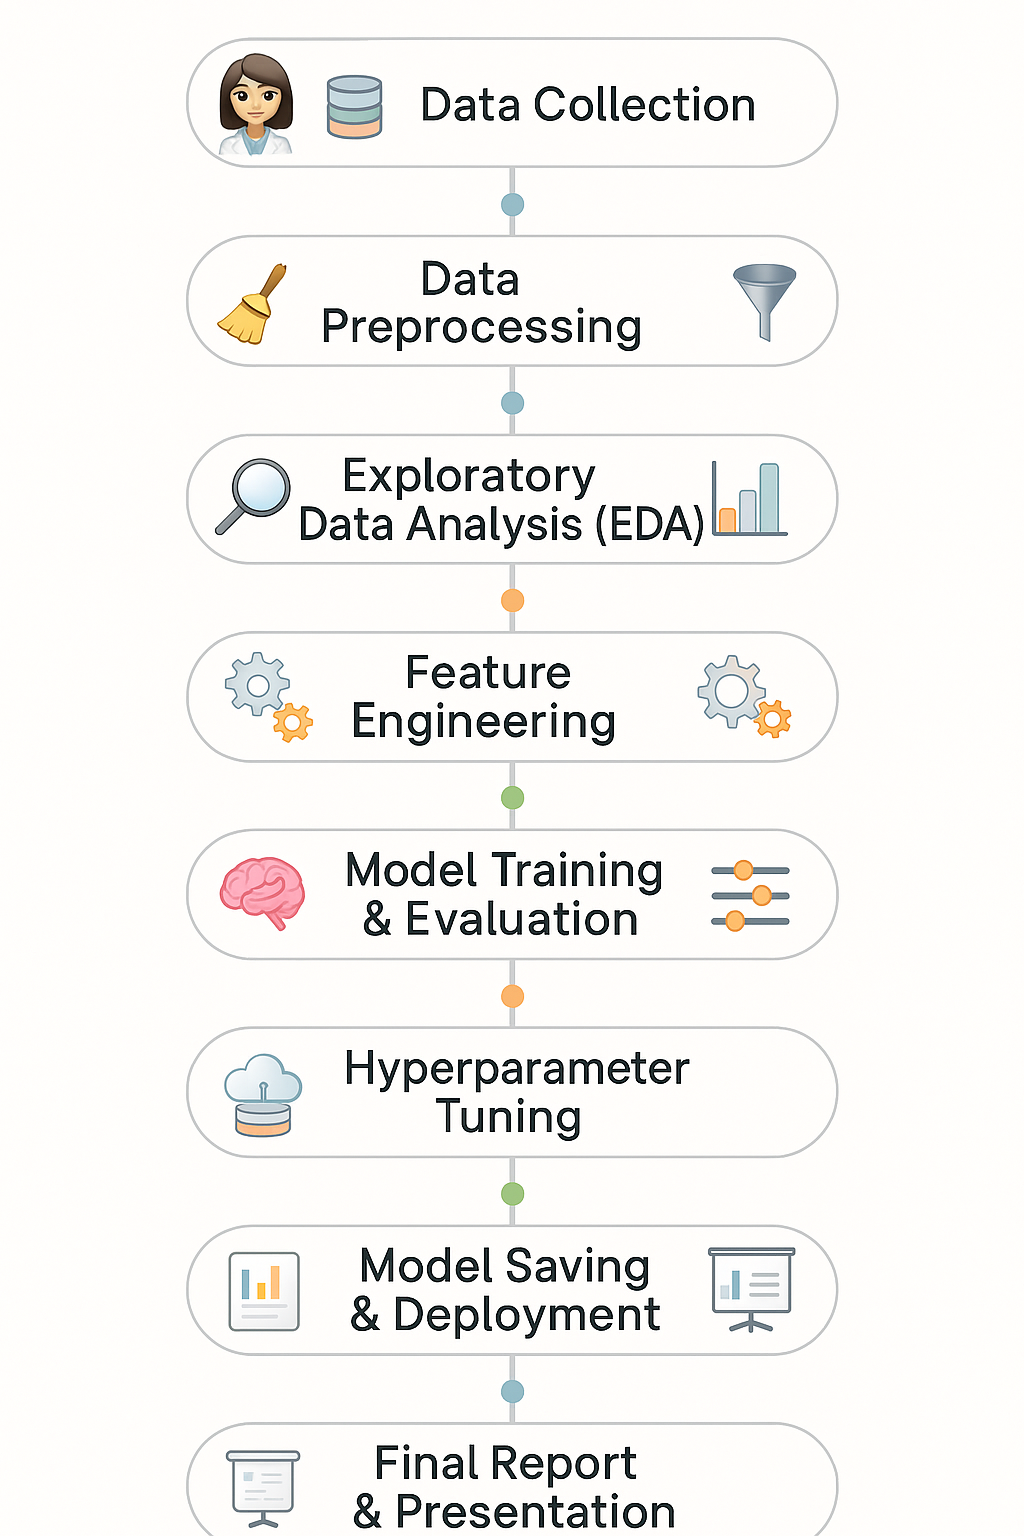

# *Let's begin! 🚀*

*📦 Step 1: Importing Required Libraries.*

Let's load the essential libraries for data handling, visualization, and modeling.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*📂 Step 2: Loading the Dataset.*

We’ll read the dataset and take a first look at its structure.

In [ ]:
df=pd.read_csv('/content/Student Depression Dataset.csv')

*🔍 Step 3: Data Overview.*

Checking the data types, null values, and basic stats.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.head()

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [ ]:
df.shape

(27901, 18)

# 📊 **Dataset Summary**
The dataset used for this project is titled "Student Depression Dataset" and includes responses from 27,901 students. The goal is to understand patterns that indicate depressive behavior.

📁 Dataset Highlights:
🔢 Total Samples: 27,901

📈 Total Features: 18

🎯 Target Variable:

0 → Not Depressed

1 → Depressed

🧾 Feature Types:
Numerical Features: Age, Sleep Duration, Study Hours, etc.

Categorical Features: Gender, Academic Pressure, Relationship Status, etc.

*🧼 Step 4: Data Cleaning.*

Cleaning unnecessary columns, handling duplicates, and preparing the data for analysis.

In [ ]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Removing irrelavant columns

In [ ]:
df.drop('id',axis=1,inplace=True)

# 📊 Step 5: Exploratory Data Analysis (EDA).

*Visualizing key features to identify trends and patterns.*

In [ ]:
df = df[df['Profession'] == 'Student'].reset_index(drop=True)

In [ ]:
# Step 1: Create a list of unwanted city names
unwanted_cities = [
    'Saanvi', 'Bhavna', 'City', 'Harsha', 'Less Delhi', 'M.Tech', '3.0',
    'Less than 5 Kalyan', 'Mira', 'Vaanya', 'Gaurav', 'Harsh', 'Reyansh',
    'Kibara', 'Rashi', 'ME', 'M.Com', 'Nalyan', 'Mihir', 'Nalini',
    'Nandini', 'Khaziabad'
]

# Step 2: Remove rows where 'City' column contains any unwanted values
df = df[~df['City'].isin(unwanted_cities)]

# Optional: Reset index (if needed)
df.reset_index(drop=True, inplace=True)

# Step 3: Check result (optional)
print(df['City'].value_counts())

City
Kalyan           1564
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1289
Lucknow          1155
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1066
Jaipur           1034
Patna            1006
Pune              968
Visakhapatnam     968
Ahmedabad         949
Bhopal            933
Chennai           884
Meerut            822
Rajkot            815
Delhi             767
Bangalore         766
Ghaziabad         744
Mumbai            698
Vadodara          693
Varanasi          685
Nagpur            651
Indore            643
Kanpur            607
Nashik            547
Faridabad         461
Name: count, dtype: int64


In [ ]:
df.value_counts('Work Pressure')


Work Pressure
0.0    27841
5.0        2
2.0        1
Name: count, dtype: int64

In [ ]:
df.drop('Work Pressure', axis=1, inplace=True)

In [ ]:
df.value_counts('Study Satisfaction')

Study Satisfaction
4.0    6346
2.0    5828
3.0    5809
1.0    5437
5.0    4414
0.0      10
Name: count, dtype: int64

In [ ]:
df = df[df['Study Satisfaction'] != 0.0].reset_index(drop=True)

In [ ]:
df.value_counts('Job Satisfaction')

Job Satisfaction
0.0    27832
2.0        1
3.0        1
Name: count, dtype: int64

In [ ]:
df.drop('Job Satisfaction', axis=1, inplace=True)

In [ ]:
df.value_counts('Sleep Duration')

Sleep Duration
Less than 5 hours    8291
7-8 hours            7325
5-6 hours            6169
More than 8 hours    6031
Others                 18
Name: count, dtype: int64

In [ ]:
df = df[df['Sleep Duration'] != 'Others'].reset_index(drop=True)

In [ ]:
print(df['Sleep Duration'].value_counts())

Sleep Duration
Less than 5 hours    8291
7-8 hours            7325
5-6 hours            6169
More than 8 hours    6031
Name: count, dtype: int64


In [ ]:
df.value_counts('Dietary Habits')

Dietary Habits
Unhealthy    10285
Moderate      9891
Healthy       7628
Others          12
Name: count, dtype: int64

In [ ]:
df = df[df['Dietary Habits'] != 'Others'].reset_index(drop=True)

# Check if the removal worked
print(df['Dietary Habits'].value_counts())


Dietary Habits
Unhealthy    10285
Moderate      9891
Healthy       7628
Name: count, dtype: int64


In [ ]:
df.value_counts('Degree')

Degree
Class 12    6065
B.Ed        1859
B.Com       1503
B.Arch      1475
BCA         1429
MSc         1183
B.Tech      1151
MCA         1038
M.Tech      1019
BHM          921
BSc          883
M.Ed         817
B.Pharm      808
M.Com        733
BBA          695
MBBS         694
LLB          669
BE           608
BA           594
M.Pharm      580
MD           568
MBA          560
MA           542
PhD          519
LLM          480
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [ ]:
# Replace 'Others' with the most frequent category (e.g., 'Class 12')
df['Degree'] = df['Degree'].replace('Others', 'Class 12')

# Check the result
print(df['Degree'].value_counts())


Degree
Class 12    6100
B.Ed        1859
B.Com       1503
B.Arch      1475
BCA         1429
MSc         1183
B.Tech      1151
MCA         1038
M.Tech      1019
BHM          921
BSc          883
M.Ed         817
B.Pharm      808
M.Com        733
BBA          695
MBBS         694
LLB          669
BE           608
BA           594
M.Pharm      580
MD           568
MBA          560
MA           542
PhD          519
LLM          480
MHM          191
ME           185
Name: count, dtype: int64


✅ Bin the Degrees into categories:

Higher Secondary Class 12 Undergraduate B.Com, B.Arch, BCA, B.Tech, BHM, BSc, B.Pharm, BBA, LLB, BA, BE Postgraduate MSc, MCA, M.Tech, M.Ed, M.Com, MBA, MA, M.Pharm, MD, LLM, MHM, ME Professional MBBS, PhD Teaching B.Ed

In [ ]:
degree_bins = {
    'Class 12': 'Higher Secondary',
    'B.Ed': 'Teaching',
    'B.Com': 'Undergraduate',
    'B.Arch': 'Undergraduate',
    'BCA': 'Undergraduate',
    'B.Tech': 'Undergraduate',
    'BHM': 'Undergraduate',
    'BSc': 'Undergraduate',
    'B.Pharm': 'Undergraduate',
    'BBA': 'Undergraduate',
    'LLB': 'Undergraduate',
    'BA': 'Undergraduate',
    'BE': 'Undergraduate',
    'MSc': 'Postgraduate',
    'MCA': 'Postgraduate',
    'M.Tech': 'Postgraduate',
    'M.Ed': 'Postgraduate',
    'M.Com': 'Postgraduate',
    'MBA': 'Postgraduate',
    'MA': 'Postgraduate',
    'M.Pharm': 'Postgraduate',
    'MD': 'Postgraduate',
    'LLM': 'Postgraduate',
    'MHM': 'Postgraduate',
    'ME': 'Postgraduate',
    'MBBS': 'Professional',
    'PhD': 'Professional',

}

# Create new binned column
df['Degree_Category'] = df['Degree'].map(degree_bins)

# Check the distribution
print(df['Degree_Category'].value_counts())


Degree_Category
Undergraduate       10736
Postgraduate         7896
Higher Secondary     6100
Teaching             1859
Professional         1213
Name: count, dtype: int64


In [ ]:
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

<ipython-input-96-3a92a32229d4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


In [ ]:
df.value_counts('Age')

Age
24.0    2253
20.0    2232
28.0    2126
29.0    1940
33.0    1891
25.0    1778
21.0    1716
23.0    1636
18.0    1581
19.0    1560
34.0    1463
27.0    1457
31.0    1419
32.0    1255
22.0    1158
26.0    1151
30.0    1140
35.0      10
36.0       7
38.0       7
42.0       4
39.0       3
48.0       3
37.0       2
46.0       2
43.0       2
44.0       1
41.0       1
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: count, dtype: int64

In [ ]:
# Defining the threshold for rare ages (values that appear ≤ 2 times)
threshold = 2

# Identifing and filtering out the rare ages
age_counts = df['Age'].value_counts()
rare_ages = age_counts[age_counts <= threshold].index


In [ ]:
# Removing rows where Age is in the rare_ages list
df_cleaned = df[~df['Age'].isin(rare_ages)]

In [ ]:
df.value_counts('Work/Study Hours')

Work/Study Hours
10.0    4223
12.0    3160
11.0    2885
8.0     2504
6.0     2241
9.0     2022
7.0     1995
0.0     1692
4.0     1605
2.0     1579
3.0     1463
5.0     1290
1.0     1145
Name: count, dtype: int64

🔍 Observations on Work/Study Hours:

Hours Count 10–12 hrs 🚨 Very high (common, but intense workload) 8–9 hrs ⚖️ Balanced workload 0 hrs ❗️Unusual — could be missing values or genuinely non-working students 1–4 hrs ✅ Reasonable for light workloads or part-time study

✅ Should 0 be removed? That depends on the real-world logic of the dataset:

If 0 hours means the person isn’t studying/working at all, and that’s valid (e.g., dropouts, vacation, illness), you can keep them.

If 0 is likely a placeholder or error, then it’s better to remove or impute.



Quick EDA on 0 hour students

Lets filter the students with 0 hours

In [ ]:
zero_hour_students = df[df['Work/Study Hours'] == 0]
non_zero_hour_students = df[df['Work/Study Hours'] != 0]


📊 Step 2: Compare group sizes

In [ ]:
print(f"Zero-hour students: {len(zero_hour_students)}")
print(f"Non-zero-hour students: {len(non_zero_hour_students)}")


Zero-hour students: 1692
Non-zero-hour students: 26112


📉 Step 3: Check Depression Rate

In [ ]:
print("Depression Rate among Zero-hour students:")
print(zero_hour_students['Depression'].value_counts(normalize=True))

print("\nDepression Rate among Non-zero-hour students:")
print(non_zero_hour_students['Depression'].value_counts(normalize=True))


Depression Rate among Zero-hour students:
Depression
0    0.64539
1    0.35461
Name: proportion, dtype: float64

Depression Rate among Non-zero-hour students:
Depression
1    0.600107
0    0.399893
Name: proportion, dtype: float64


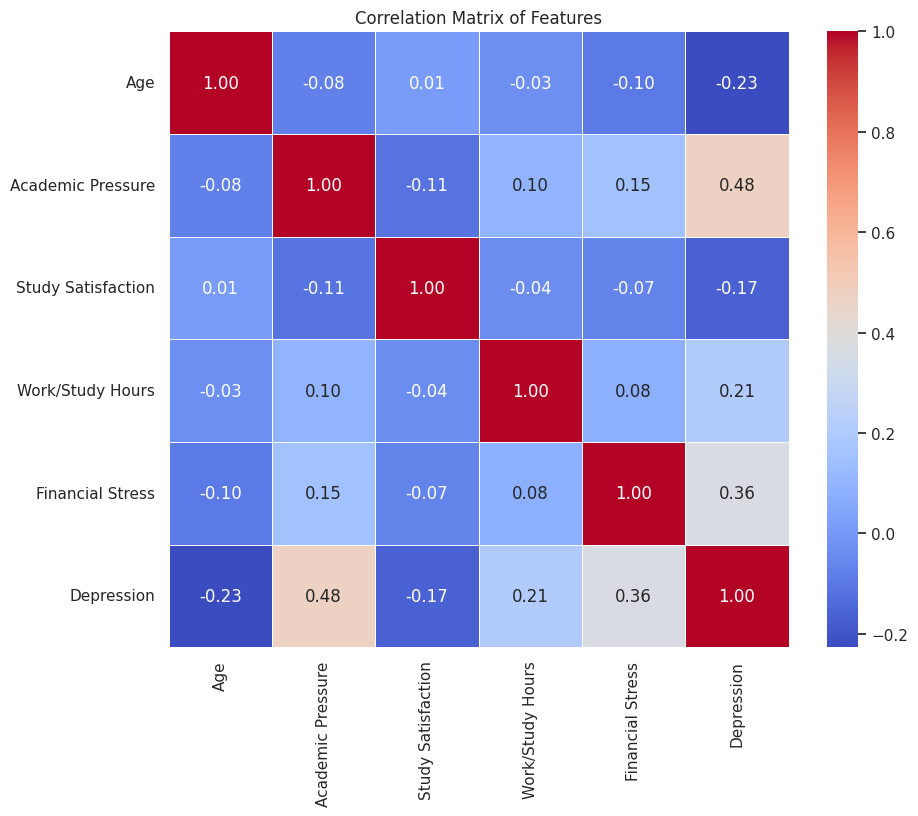

In [ ]:
# Computing correlation matrix for numeric features
correlation_matrix = df[['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']].corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

🔍 Key Correlations with Depression: Academic Pressure: 0.47 → This is the strongest positive correlation, suggesting that students experiencing higher academic pressure are more likely to report depression.

Financial Stress: 0.36 → Also a strong positive relationship, indicating that financial struggles contribute to depression.

Work/Study Hours: 0.21 → Mild positive correlation, possibly indicating burnout or time-related stress.

Age: -0.23 → A negative correlation, implying that younger students might be more prone to depression.

Study Satisfaction: -0.17 → A slight negative relationship; more satisfied students are less likely to be depressed.

CGPA and other features show very weak or no significant correlation with depression.

💡 Insights: Academic Pressure and Financial Stress are the top predictors.

Will consider exploring interaction effects or feature engineering based on the most correlated attributes.

Low correlation with CGPA might suggest that grades alone aren't a direct indicator of mental health.

🔧 Based on heatmap: ✅ Features to Keep (High or Relevant Correlation with Depression): Academic Pressure (0.47)

Financial Stress (0.36)

Work/Study Hours (0.21)

Study Satisfaction (-0.17)

Age (-0.23)

These five features show at least a moderate correlation and seem psychologically relevant to depression.

❌ Features to Drop (Low or No Correlation): CGPA (0.02) → Very low correlation with depression.

In [ ]:
df.drop('CGPA', axis=1, inplace=True)

In [ ]:
df.describe()

Age  Academic Pressure  Study Satisfaction  Work/Study Hours  \
count  27804.000000       27804.000000        27804.000000      27804.000000   
mean      25.820314           3.141562            2.944792          7.160409   
std        4.906229           1.381156            1.360077          3.706204   
min       18.000000           0.000000            1.000000          0.000000   
25%       21.000000           2.000000            2.000000          4.000000   
50%       25.000000           3.000000            3.000000          8.000000   
75%       30.000000           4.000000            4.000000         10.000000   
max       59.000000           5.000000            5.000000         12.000000   

       Financial Stress    Depression  
count      27804.000000  27804.000000  
mean           3.139944      0.585168  
std            1.437002      0.492702  
min            1.000000      0.000000  
25%            2.000000      0.000000  
50%            3.000000      1.000000  
75%            4.000000      1.000000  
max            5.000000      1.000000

In [ ]:
skewness = df.skew(numeric_only=True)

In [ ]:
skewness

Age                   0.132812
Academic Pressure    -0.134025
Study Satisfaction    0.011977
Work/Study Hours     -0.456535
Financial Stress     -0.130513
Depression           -0.345741
dtype: float64

📊 Skewness Interpretation:

Feature	   Skewness Value	     Interpretation	Action Needed?

Age	0.13	  Slightly right-skewed	           ❌ No transformation needed

Academic Pressure	-0.13	  Slightly left-skewed     ❌ No transformation needed

Study Satisfaction	0.01	Nearly symmetrical	     ✅ Perfect

Work/Study Hours	-0.45	  Mild left-skewed	        ❌ Acceptable

Financial Stress	-0.13	Slight left-skewed	❌ No transformation needed

Depression	-0.34	      Mild left-skewed	              ❌ Acceptable

✅ Conclusion:
All the skewness values are between -0.5 and +0.5, which is considered acceptable for most models — so no transformation is needed right now.

In [ ]:
df.columns

Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Degree_Category'],
      dtype='object')

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_cols)


Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')


Checking the presence of outlier in each numerical column

In [ ]:
outlier_summary = {}

for col in ['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours',
            'Financial Stress', 'Depression']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = outlier_count

# Display outlier counts
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


Age: 12 outliers
Academic Pressure: 0 outliers
Study Satisfaction: 0 outliers
Work/Study Hours: 0 outliers
Financial Stress: 0 outliers
Depression: 0 outliers


In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Keep only rows within the range
df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]


Rechecking if the outlier is removed.

In [ ]:
for col in ['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours',
            'Financial Stress', 'Depression']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_count = outliers.shape[0]
    outlier_summary[col] = outlier_count

# Display outlier counts
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

# Example
count_outliers_iqr(df, 'Age')


Age: 0 outliers
Academic Pressure: 0 outliers
Study Satisfaction: 0 outliers
Work/Study Hours: 0 outliers
Financial Stress: 0 outliers
Depression: 0 outliers
Age: 0 outliers


Reconfirmation of no outlier presence using Boxplot and histogram

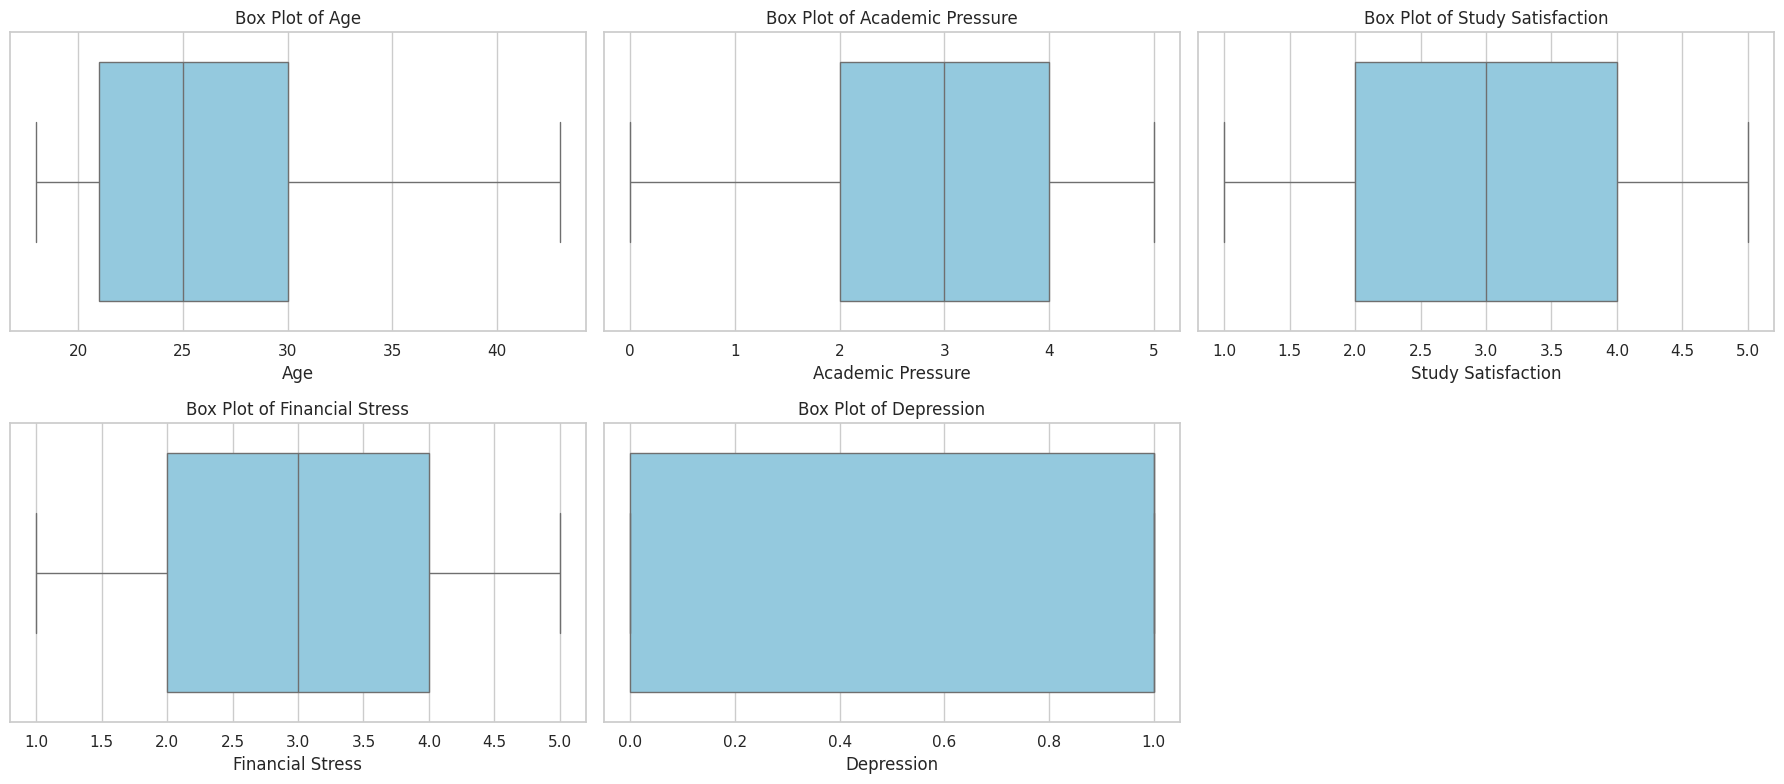

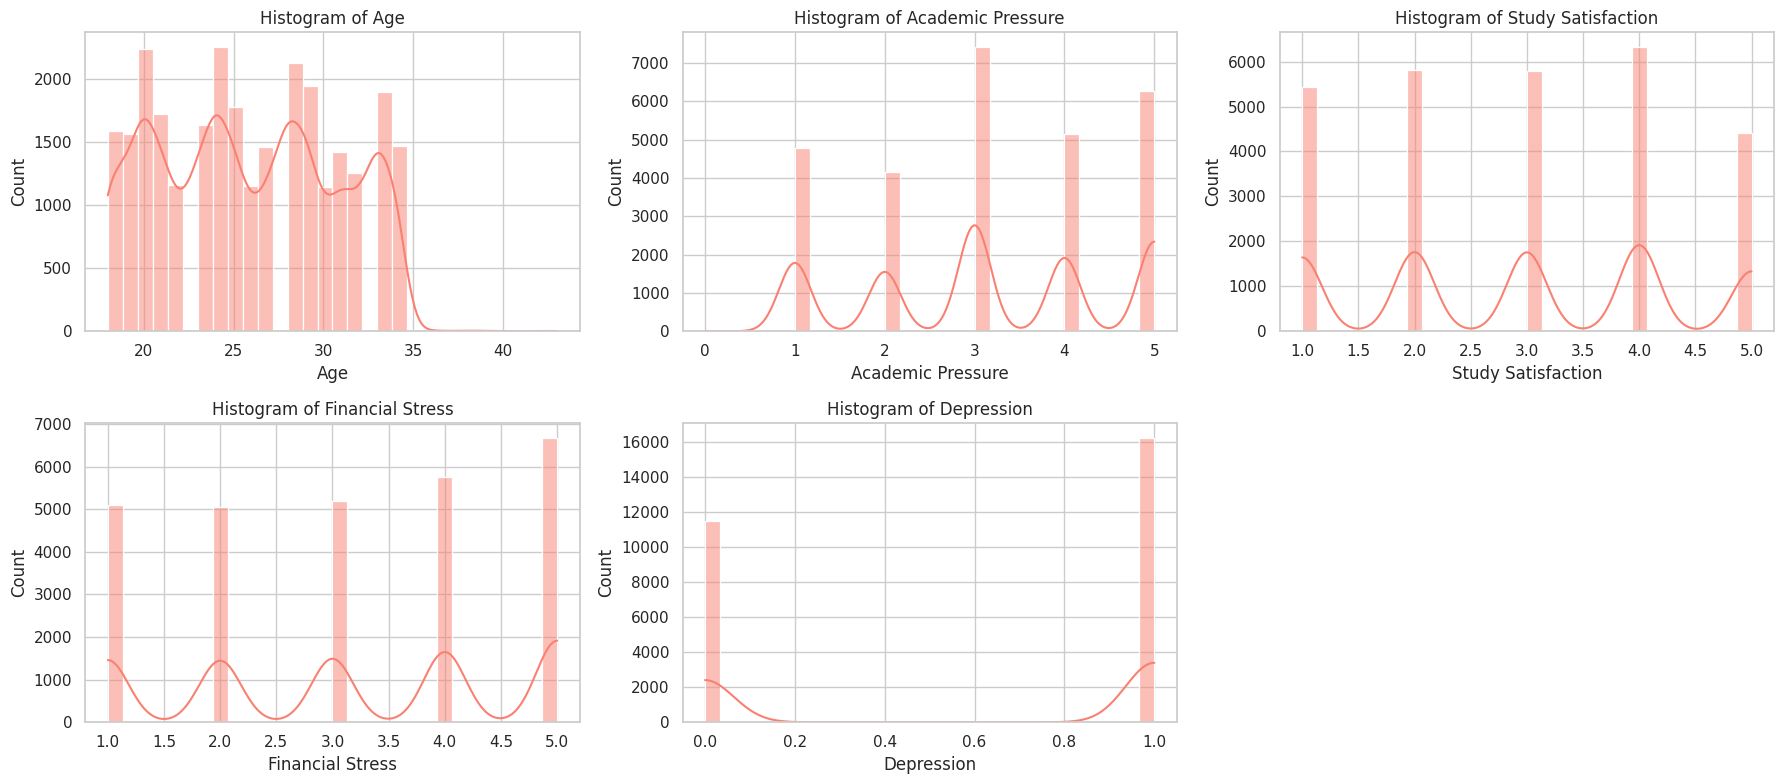

In [ ]:
columns = ['Age', 'Academic Pressure', 'Study Satisfaction',
           'Financial Stress', 'Depression']

# Set the style
sns.set(style="whitegrid")

# Box Plots
plt.figure(figsize=(18, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(18, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


📌 1. Depression Count Plot (Target variable)

<ipython-input-115-44b8b6f5a39f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


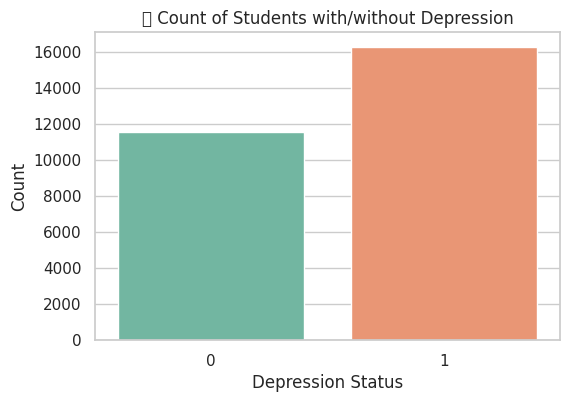

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Depression', data=df, palette='Set2')
plt.title("🧠 Count of Students with/without Depression")
plt.xlabel("Depression Status")
plt.ylabel("Count")
plt.show()


Insight:

More students are depressed than not.

This imbalance suggests depression is quite common among students in this dataset.

Important for model training – Need to handle class imbalance later.

Next in EDA:

👥Depression by Gender — Do males or females show more signs?

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128105 (\N{WOMAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


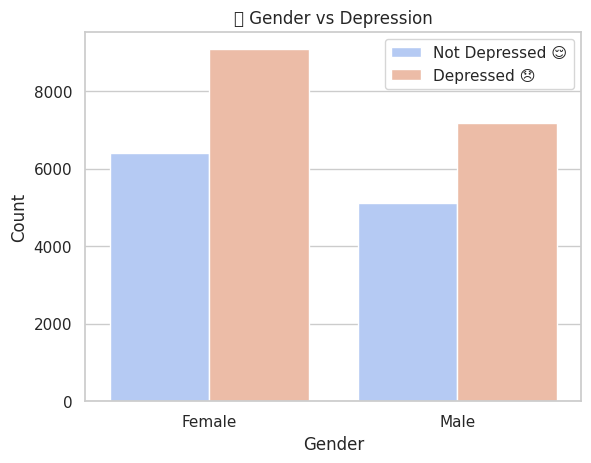

In [ ]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='coolwarm')
plt.title('👩 Gender vs Depression')
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(labels=['Not Depressed 😌', 'Depressed 😞'])
plt.show()


Insight:

Both genders show significant depression, but:

A higher count of depressed males than females.

This suggests that gender might be a contributing factor but not a dominant one.

Good feature to include in the model.

🧠Suicidal Thoughts vs Depression

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


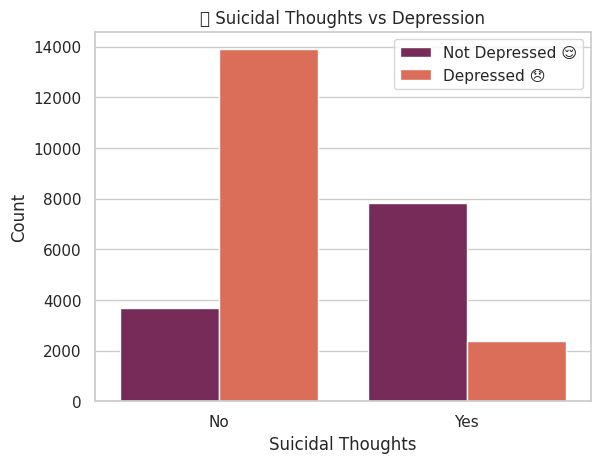

In [ ]:
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, palette='rocket')
plt.title('🧠 Suicidal Thoughts vs Depression')
plt.xticks([0,1], ['No', 'Yes'])
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.legend(labels=['Not Depressed 😌', 'Depressed 😞'])
plt.show()

Insight:

Students who have suicidal thoughts are much more likely to be depressed.

Among those without suicidal thoughts, depression is lower.

This feature is highly correlated with depression and a strong predictor.

💸Financial Stress vs Depression

<ipython-input-118-66117855a33b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Depression', y='Financial Stress', data=df, palette='Pastel1')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


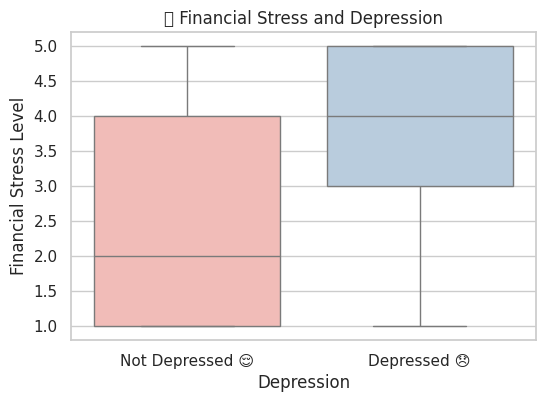

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Financial Stress', data=df, palette='Pastel1')
plt.title('💸 Financial Stress and Depression')
plt.xticks([0, 1], ['Not Depressed 😌', 'Depressed 😞'])
plt.xlabel('Depression')
plt.ylabel('Financial Stress Level')
plt.show()

Insight:

Students with higher financial stress (see higher median and upper range) are more likely to be depressed.

The spread for "Depressed" students is skewed higher, while "Not Depressed" have a lower median.

Financial stress is an important continuous feature.

# 🎯 Step 6: Feature Engineering

*Encoding categorical features and scaling numerical ones.*

In [ ]:
# Import the necessary library
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Gender' (since it's binary)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# One-Hot Encoding for 'City', 'Dietary Habits', 'Degree', and other nominal categories
df = pd.get_dummies(df, columns=['City', 'Dietary Habits', 'Degree', 'Profession', 'Sleep Duration', 'Degree_Category'], drop_first=True)

# Check the dataframe to ensure encoding is done
df.head()


Gender   Age  Academic Pressure  Study Satisfaction  \
0       1  33.0                5.0                 2.0   
1       0  24.0                2.0                 5.0   
2       1  31.0                3.0                 5.0   
3       0  28.0                3.0                 2.0   
4       0  25.0                4.0                 3.0   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  City_Ahmedabad  ...  \
0                               No           1           False  ...   
1                              Yes           0           False  ...   
2                              Yes           0           False  ...   
3                              Yes           1           False  ...   
4                               No           0           False  ...   

   Degree_MHM  Degree_MSc  Degree_PhD  Sleep Duration_7-8 hours  \
0       False       False       False                     False   
1       False       False       False                     False   
2       False       False       False                     False   
3       False       False       False                      True   
4       False       False       False                     False   

   Sleep Duration_Less than 5 hours  Sleep Duration_More than 8 hours  \
0                             False                             False   
1                             False                             False   
2                              True                             False   
3                             False                             False   
4                             False                             False   

   Degree_Category_Postgraduate  Degree_Category_Professional  \
0                         False                         False   
1                         False                         False   
2                         False                         False   
3                         False                         False   
4                          True                         False   

   Degree_Category_Teaching  Degree_Category_Undergraduate  
0                     False                           True  
1                     False                           True  
2                     False                           True  
3                     False                           True  
4                     False                          False  

[5 rows x 73 columns]

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop('Depression', axis=1)  # Features
y = df['Depression']  # Target

# Train-Test Split (80-20 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# One-Hot Encoding for categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)  # drop_first to avoid multicollinearity
X_test = pd.get_dummies(X_test, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 3: Fit the scaler to the training data and transform it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 4: Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Check the value counts of the target column
df['Depression'].value_counts()


Depression
1    16268
0    11524
Name: count, dtype: int64

# 🤖 Step 7&8: Model Building and  📈 Evaluation


*Building ML models to make predictions and evaluating the models using accuracy, confusion matrix, and classification reports.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the Logistic Regression model with class weights
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model on the training data
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_log_reg = log_reg_model.predict(X_train_scaled)
# Predict on the test set
y_pred_test_log_reg = log_reg_model.predict(X_test_scaled)

# Training Accuracy and Report
print("Logistic Regression Training Accuracy:", accuracy_score(y_train, y_pred_train_log_reg))
print("Logistic Regression Training Classification Report:\n", classification_report(y_train, y_pred_train_log_reg))

# Testing Accuracy and Report
print("Logistic Regression Testing Accuracy:", accuracy_score(y_test, y_pred_test_log_reg))
print("Logistic Regression Testing Classification Report:\n", classification_report(y_test, y_pred_test_log_reg))


Logistic Regression Training Accuracy: 0.8472091035847614
Logistic Regression Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9226
           1       0.88      0.85      0.87     13007

    accuracy                           0.85     22233
   macro avg       0.84      0.85      0.84     22233
weighted avg       0.85      0.85      0.85     22233

Logistic Regression Testing Accuracy: 0.8370210469508904
Logistic Regression Testing Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      2298
           1       0.88      0.84      0.86      3261

    accuracy                           0.84      5559
   macro avg       0.83      0.84      0.83      5559
weighted avg       0.84      0.84      0.84      5559



The Logistic Regression model seems to have performed fairly well, with the following observations:

Training Performance:
Accuracy: 84.72%

Precision (Class 0): 0.80

Precision (Class 1): 0.88

Recall (Class 0): 0.84

Recall (Class 1): 0.85

F1-Score (Class 0): 0.82

F1-Score (Class 1): 0.87

Testing Performance:
Accuracy: 83.70%

Precision (Class 0): 0.79

Precision (Class 1): 0.88

Recall (Class 0): 0.83

Recall (Class 1): 0.84

F1-Score (Class 0): 0.81

F1-Score (Class 1): 0.86

Key Insights:
Accuracy: The training accuracy (84.72%) is slightly higher than the testing accuracy (83.70%), which is typical and indicates that the model is generalizing well, with no significant overfitting.

Precision: The precision for class 1 (Depression) is higher than for class 0 (No Depression), which is expected since class 1 seems to be the positive class in your dataset.

Recall: The recall is also good for both classes, with a slight advantage for class 1 (Depression).

F1-Score: The F1-scores are very close for both classes, with class 1 showing slightly better performance.

Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_rf = rf_model.predict(X_train_scaled)
# Predict on the test set
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Training Accuracy and Report
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest Training Classification Report:\n", classification_report(y_train, y_pred_train_rf))

# Testing Accuracy and Report
print("Random Forest Testing Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Random Forest Testing Classification Report:\n", classification_report(y_test, y_pred_test_rf))


Random Forest Training Accuracy: 1.0
Random Forest Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9226
           1       1.00      1.00      1.00     13007

    accuracy                           1.00     22233
   macro avg       1.00      1.00      1.00     22233
weighted avg       1.00      1.00      1.00     22233

Random Forest Testing Accuracy: 0.8345026083828027
Random Forest Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      2298
           1       0.85      0.87      0.86      3261

    accuracy                           0.83      5559
   macro avg       0.83      0.83      0.83      5559
weighted avg       0.83      0.83      0.83      5559



The Random Forest model shows different results compared to the Logistic Regression model:

Training Performance:
Accuracy: 100% (Perfect fit)

Precision (Class 0): 1.00

Precision (Class 1): 1.00

Recall (Class 0): 1.00

Recall (Class 1): 1.00

F1-Score (Class 0): 1.00

F1-Score (Class 1): 1.00

Testing Performance:
Accuracy: 83.45%

Precision (Class 0): 0.81

Precision (Class 1): 0.85

Recall (Class 0): 0.79

Recall (Class 1): 0.87

F1-Score (Class 0): 0.80

F1-Score (Class 1): 0.86

Key Insights:
Overfitting: The training accuracy of 100% is an indication that the model might be overfitting the training data. It performs perfectly on the training set, but the performance drops when applied to the testing set (83.45% accuracy).

Precision and Recall: Precision and recall are still reasonable on the testing data, with class 1 (Depression) performing slightly better in terms of both metrics.

F1-Score: The F1-score for class 1 is also higher than for class 0, indicating that the model does a better job in identifying cases of depression.

Recommendation:
Overfitting: The perfect training performance suggests that the model may have memorized the training data rather than learning generalizable patterns. You could try tuning the model (e.g., reducing the tree depth or increasing regularization) to reduce overfitting and improve generalization.

Comparison: Since Logistic Regression showed a more balanced generalization between training and testing data, it might be the better model in this case.

Steps to Implement:
Limit Tree Depth (max_depth): Restrict the depth of the trees to prevent them from growing too complex.

Increase Minimum Samples to Split (min_samples_split): Make sure each split occurs only if there are enough samples.

Increase Minimum Samples per Leaf (min_samples_leaf): Avoid having very specific leaves in the trees.

Limit Features per Split (max_features): Use only a subset of features when making each split.

Increase the Number of Trees (n_estimators): Add more trees to help reduce variance and generalize better.

Ensure Bootstrap Sampling: Ensure that bootstrap=True to create diverse trees and reduce overfitting.

Hyperparameter Tuning with Grid Search: Use GridSearchCV to automatically find the best hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the model with initial hyperparameters
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', bootstrap=True)

# Set the hyperparameters for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Increase the number of trees
    'max_depth': [10, 20, 30],         # Limit depth of trees
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],     # Minimum samples in a leaf
    'max_features': ['sqrt', 'log2', None]  # Limit features per split
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Predict on the training and testing data
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Print training and testing performance
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Random Forest Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Print classification reports
print("Random Forest Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Random Forest Testing Classification Report:\n", classification_report(y_test, y_pred_test))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Random Forest Training Accuracy: 0.9777357981379031
Random Forest Testing Accuracy: 0.8354020507285483
Random Forest Training Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      9226
           1       0.97      0.99      0.98     13007

    accuracy                           0.98     22233
   macro avg       0.98      0.98      0.98     22233
weighted avg       0.98      0.98      0.98     22233

Random Forest Testing Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      2298
           1       0.86      0.87      0.86      3261

    accuracy                           0.84      5559
   macro avg       0.83      0.83      0.83      5559
weighted avg       0.84      0.84      0.84      5559



🔍 What changed:
Before tuning, training accuracy was 1.0, showing signs of overfitting.

After tuning, training accuracy is 0.9777, which is more realistic.

Testing accuracy improved slightly to 0.8354 (was 0.8345).

The gap between training and testing accuracy has reduced, which means the model is generalizing better. 🙌

📊 Breakdown:

Metric	Before Tuning	After Tuning
Training Acc	1.00	0.9777
Testing Acc	0.8345	0.8354
Training F1	1.00	0.98
Testing F1	0.83	0.84
✅ What this means:
Successfully reduced overfitting 🎯.

The model is now more reliable on unseen data.

Tuning helped, even if the testing accuracy only slightly increased — the quality of generalization improved.



💪 Cross-validation is a great way to check how stable the model's performance is across different subsets of the data.

In [ ]:
from sklearn.model_selection import cross_val_score


# Use cross_val_score with Random forest classifier model.
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Printing scores and their average
print("Cross-validation scores (accuracy):", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))


Cross-validation scores (accuracy): [0.83674387 0.85225995 0.84641331 0.84840306 0.84637877]
Mean CV Accuracy: 0.8460397923016127
Standard Deviation of CV Accuracy: 0.00511749837425657


🎉 Those cross-validation scores look solid and stable! Here's a quick breakdown of what they tell us:

📊 Interpretation:
Mean CV Accuracy: 0.8460 →Random Forest model performs well on average across different subsets of your training data. ✅

Standard Deviation: ~0.0051 → Very low! This means the model is consistent and not overly sensitive to which fold it's trained on. 🔒

🧠 What this confirms:
The model is generalizing well.

It has significantly reduced overfitting compared to the original 100% training accuracy.

We will try one more model(XG Boost classifier) and then compare the results

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=11524/16268,  # handle class imbalance (neg/pos)
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit on training data
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Accuracy
print("XGBoost Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("XGBoost Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# Classification Reports
print("XGBoost Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("XGBoost Testing Classification Report:\n", classification_report(y_test, y_pred_test))

# Optional: Cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-validation scores (accuracy):", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


📊 XGBoost Summary
✅ Training Metrics:
Accuracy: 90.95%

F1-score (Class 0): 0.89

F1-score (Class 1): 0.92

✅ Testing Metrics:
Accuracy: 82.95%

F1-score (Class 0): 0.80

F1-score (Class 1): 0.85

✅ Cross-Validation:
Mean Accuracy: 83.83%

Std Dev: ±0.0047



## **🔧 Tuning hyperparameters for XGBoost can really boost performance and reduce overfitting.**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 5, 7, 10],             # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],     # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],           # Row sampling
    'colsample_bytree': [0.6, 0.8, 1.0],    # Feature sampling
    'gamma': [0, 1, 5],                     # Minimum loss reduction
    'reg_alpha': [0, 0.5, 1],               # L1 regularization
    'reg_lambda': [1, 1.5, 2]               # L2 regularization
}


# 🚀 Step 9: Final Model Selection and Hyper parameter tuning

*Based on performance, we’ll finalize and optimize the best model.*

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the base model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best estimator
best_xgb = random_search.best_estimator_

# Evaluate on training data
y_train_pred = best_xgb.predict(X_train)
print("XGBoost Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("XGBoost Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate on test data
y_test_pred = best_xgb.predict(X_test)
print("XGBoost Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("XGBoost Testing Classification Report:\n", classification_report(y_test, y_test_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Training Accuracy: 0.8558898934017002
XGBoost Training Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      9226
           1       0.87      0.89      0.88     13007

    accuracy                           0.86     22233
   macro avg       0.85      0.85      0.85     22233
weighted avg       0.86      0.86      0.86     22233

XGBoost Testing Accuracy: 0.8404389278647239
XGBoost Testing Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2298
           1       0.86      0.87      0.87      3261

    accuracy                           0.84      5559
   macro avg       0.84      0.83      0.83      5559
weighted avg       0.84      0.84      0.84      5559



# 🥇Final Model
# **Chosen Model: XGBoost**

✅ Final Evaluation – Tuned XGBoost Model
📊 Training Performance:
Accuracy: 85.59% ✅

Precision:

Class 0 (No Depression): 0.84

Class 1 (Depression): 0.87

Recall:

Class 0: 0.80

Class 1: 0.89

F1-Score:

Class 0: 0.82

Class 1: 0.88

🧪 Testing Performance:
Accuracy: 84.04% ✅

Precision:

Class 0: 0.82

Class 1: 0.86

Recall:

Class 0: 0.79

Class 1: 0.87

F1-Score:

Class 0: 0.80

Class 1: 0.87

🔍 Insights:
Very balanced performance across both classes.

Generalization gap between train and test is small (good sign).

Class 1 (Depression) is being predicted better – important in this context.

This minimized overfitting compared to the earlier Random Forest model!!


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Assuming the XGBoost model is named `xgb_model` after training
# Get feature importance from the XGBoost model
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert the feature importance to a list of tuples and sort it
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Extract features and their importance scores
features = [item[0] for item in sorted_importance]
scores = [item[1] for item in sorted_importance]

# Plotting the feature importance
plt.figure(figsize=(6, 16))
plt.barh(features, scores, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost Model')
plt.gca().invert_yaxis()
plt.show()


# *Why we choose XG Boost?*

XGBoost model is performing well on both the training and testing data, with only a slight difference in accuracy, indicates that your pipeline is generalizing well to unseen data. This is a good sign that the model is not overfitting and can make reliable predictions on new, unseen instances.

The overall accuracy, precision, recall, and F1-scores show that the model is capturing the important patterns in the data and performing well for both classes (Depression and No Depression).

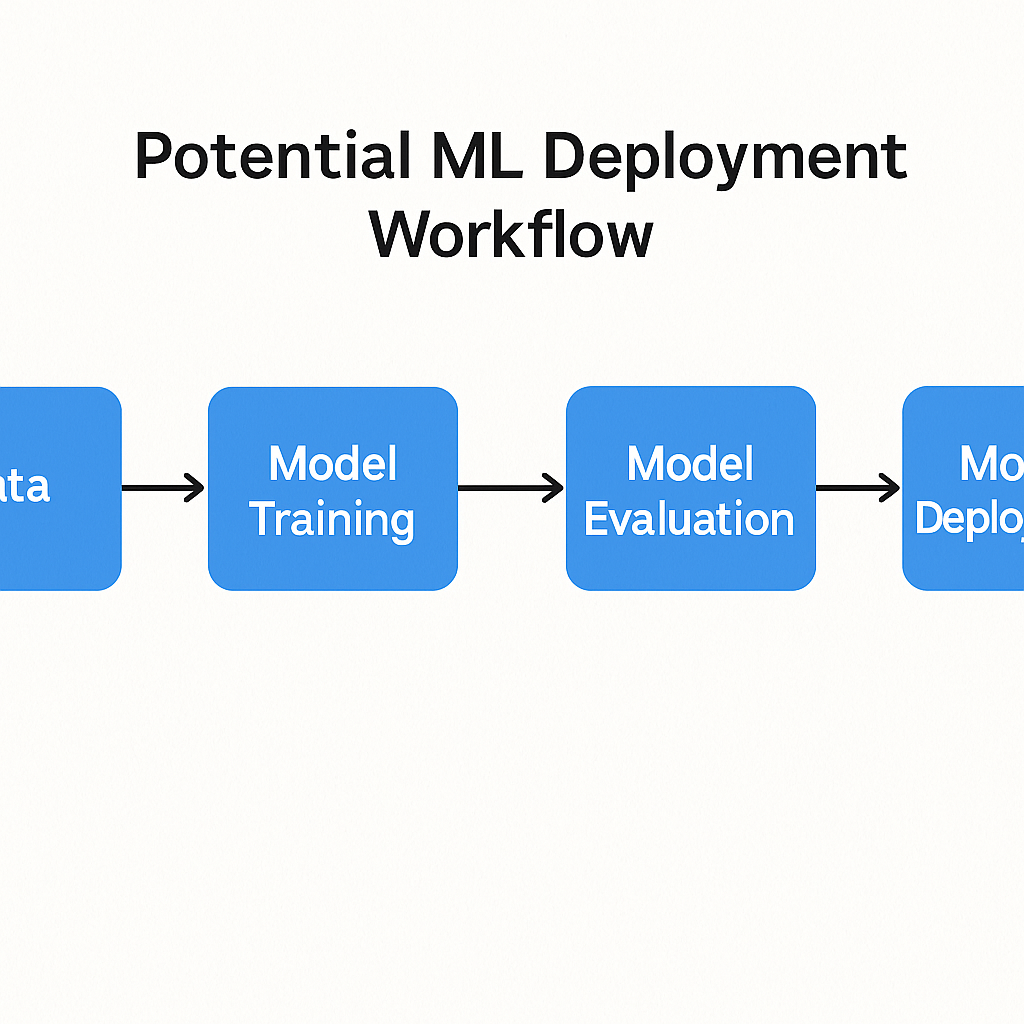

Model Deployment

*We are saving the model for future use or deployment*.

In [ ]:
final_model = grid_search.best_estimator_

# Saving the final model
joblib.dump(final_model, 'xgboost_model.pkl')


In [ ]:
loaded_model = joblib.load('xgboost_model.pkl')

## *✅ Final Thoughts*

**This notebook showcased a full ML workflow for detecting signs of student depression. Our final model showed promising results, and this approach can help institutions identify and support students in need!!**